In [8]:
# You might not need this in Colab, but install if required
!pip install -q scikit-learn xgboost


In [9]:
import pandas as pd

df = pd.read_csv("/content/fake_news.csv")
df.head()


,id,title,label
0,1,COVID vaccine causes infertility,1
1,2,NASA announces new Mars rover findings,0
2,3,Bill Gates owns all the farmland in America,1
3,4,Scientists discover new species in the Amazon ...,0
4,5,5G towers spreading coronavirus,1


In [10]:
# Check dataset info
print(df.info())

# Check class distribution
print("\nLabel Distribution:\n", df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   title   10 non-null     object
 2   label   10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes
None

Label Distribution:
 label
1    5
0    5
Name: count, dtype: int64


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and digits
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_title'] = df['title'].apply(clean_text)
df[['title', 'clean_title', 'label']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,clean_title,label
0,COVID vaccine causes infertility,covid vaccin caus infertil,1
1,NASA announces new Mars rover findings,nasa announc new mar rover find,0
2,Bill Gates owns all the farmland in America,bill gate own farmland america,1
3,Scientists discover new species in the Amazon ...,scientist discov new speci amazon rainforest,0
4,5G towers spreading coronavirus,g tower spread coronaviru,1


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_title'])
y = df['label']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

ROC-AUC: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


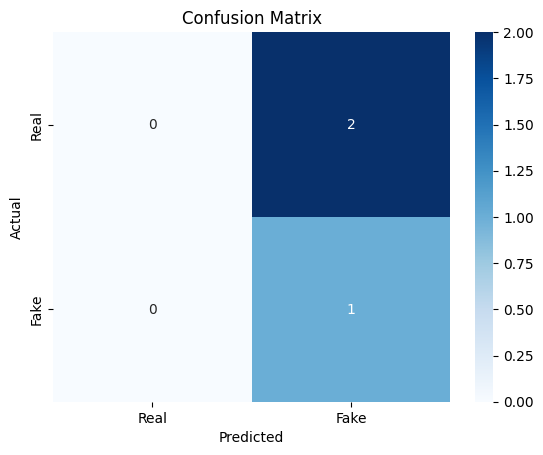

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
pred_df = df.copy()
pred_df['predicted_proba'] = lr.predict_proba(X)[:, 1]
pred_df[['id', 'title', 'predicted_proba']].to_csv("final_predictions.csv", index=False)
print("Saved predictions to final_predictions.csv")


Saved predictions to final_predictions.csv
